<a href="https://colab.research.google.com/github/Artenida/computer_vision_lessons/blob/main/Unsupervised_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage as sk
import numpy as np


I = sk.data.astronaut() # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],I.shape[2]))
print('The shape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],I.shape[2]))

v_I.shape

Here N = 262144 and d = 3
The sape of the array should be 262144 x 3


(262144, 3)

WE treat the image pixels as data points in intensity space (grayscale or RGB).

K-Means tries to cluster them based on similarity (in terms of pixel intensity or color).

The result is a segmentation where each region corresponds to one cluster.

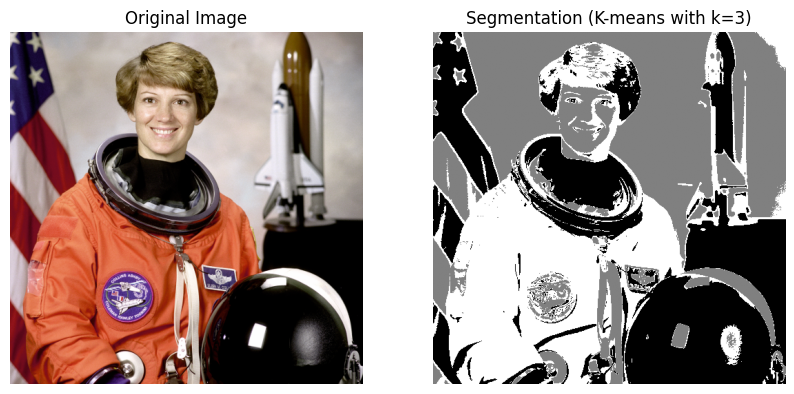

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 3 #original: 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster, 0 (vessels should be white), when we want to invert colors
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1])) # reshape back to original image size
# Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

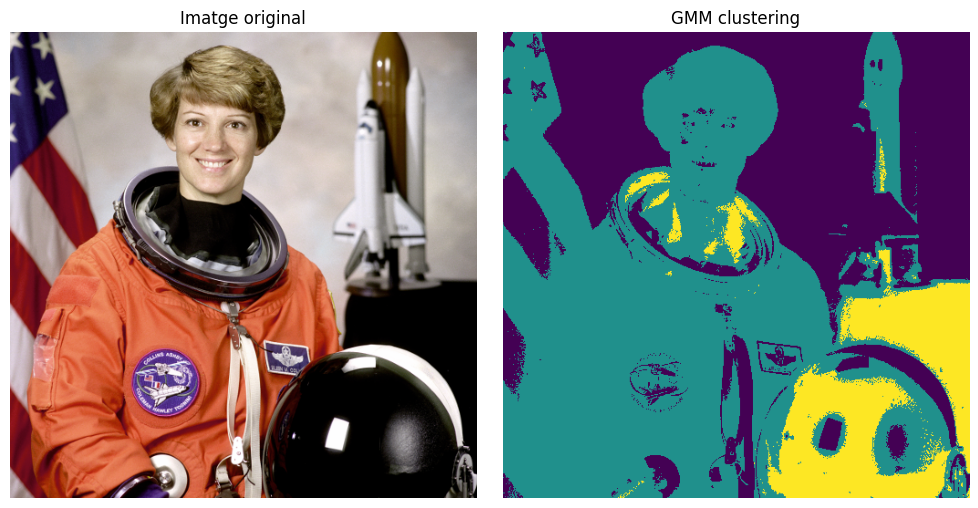

In [ ]:
import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=3).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Imatge original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = [] # Bayesian Information Criterion
# Loop over different number of clusters (G)
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(v_I)
    bic.append(gmm.bic(v_I))
    print(bic)

# Choose the best G (number of clusters)
idx_winner = np.argmin(bic) # finds the index of the lowest BIC score
print('...and the winner is GMM model G = {}'.format(idx_winner+1))

# Train the "winning" model
gmm_win = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(v_I)

[np.float64(8019969.219591582)]
[np.float64(8019969.219591582), np.float64(7627407.356090471)]
[np.float64(8019969.219591582), np.float64(7627407.356090471), np.float64(6352787.955353349)]
[np.float64(8019969.219591582), np.float64(7627407.356090471), np.float64(6352787.955353349), np.float64(6108977.173330381)]
[np.float64(8019969.219591582), np.float64(7627407.356090471), np.float64(6352787.955353349), np.float64(6108977.173330381), np.float64(5696037.911883515)]
[np.float64(8019969.219591582), np.float64(7627407.356090471), np.float64(6352787.955353349), np.float64(6108977.173330381), np.float64(5696037.911883515), np.float64(5592442.249548872)]
[np.float64(8019969.219591582), np.float64(7627407.356090471), np.float64(6352787.955353349), np.float64(6108977.173330381), np.float64(5696037.911883515), np.float64(5592442.249548872), np.float64(5569400.046505331)]
[np.float64(8019969.219591582), np.float64(7627407.356090471), np.float64(6352787.955353349), np.float64(6108977.173330381), 

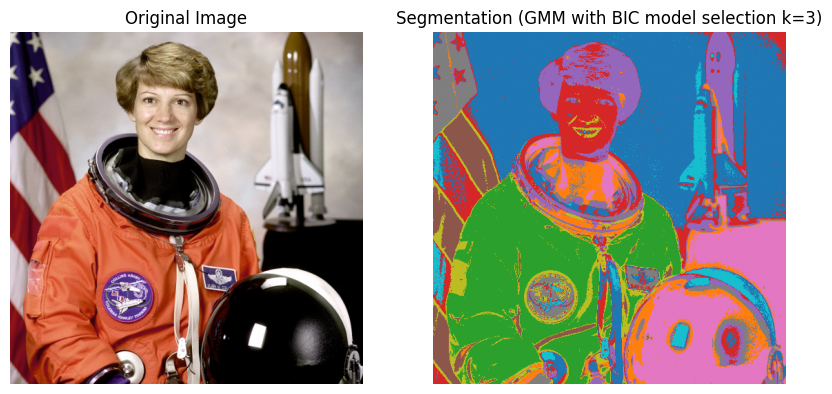

In [ ]:
v_gmm = gmm_win.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm_bic = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_gmm_bic, cmap=plt.cm.tab10)
ax2.set_title('Segmentation (GMM with BIC model selection k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()